In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("Mall_Customers.csv")

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81


# Univariate Analysis

In [27]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


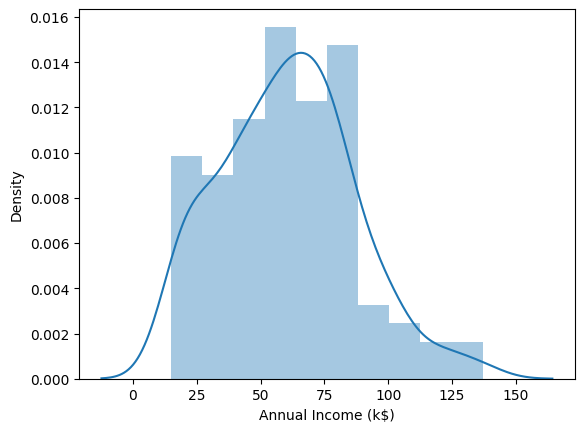

In [28]:
sns.distplot(df['Annual Income (k$)']);

In [29]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

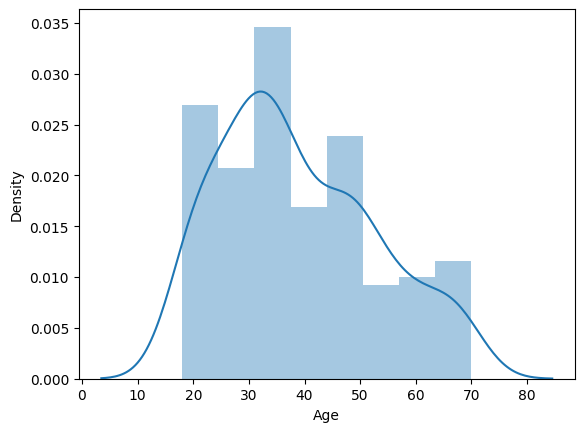

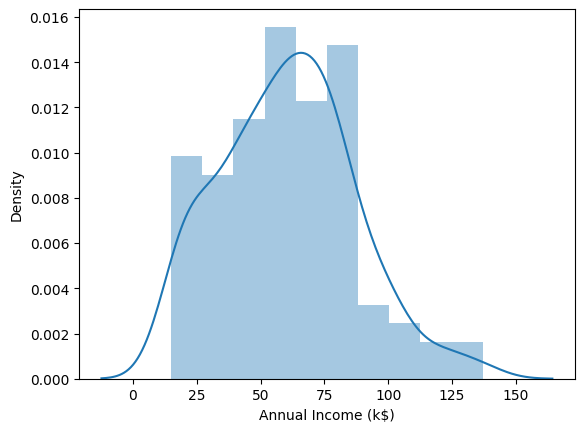

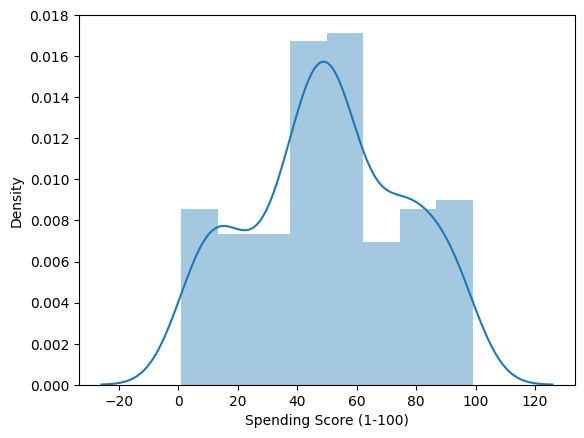

In [30]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

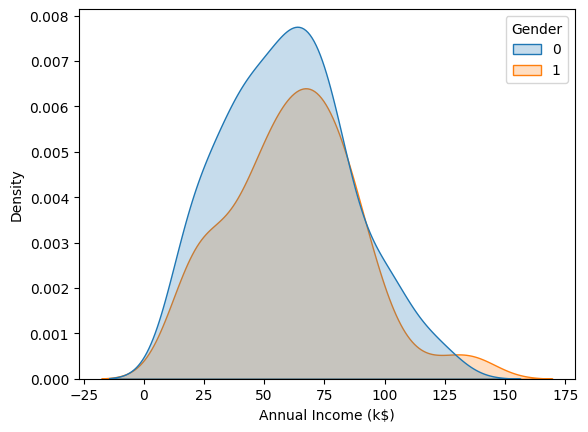

In [34]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)

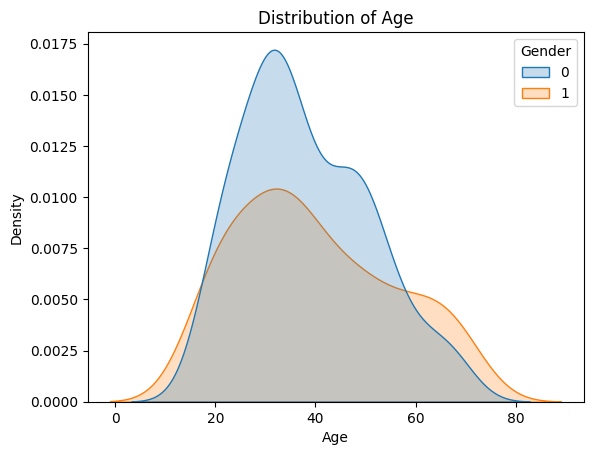

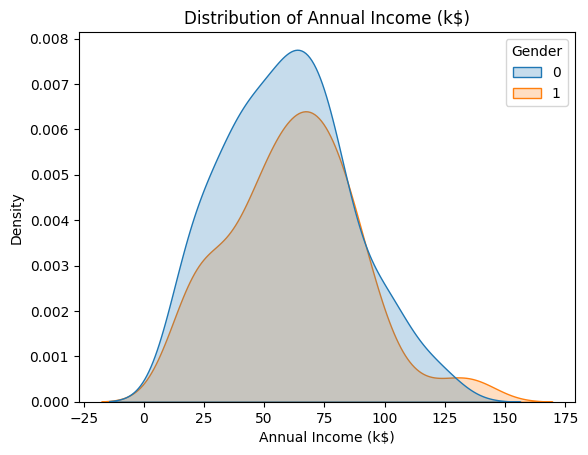

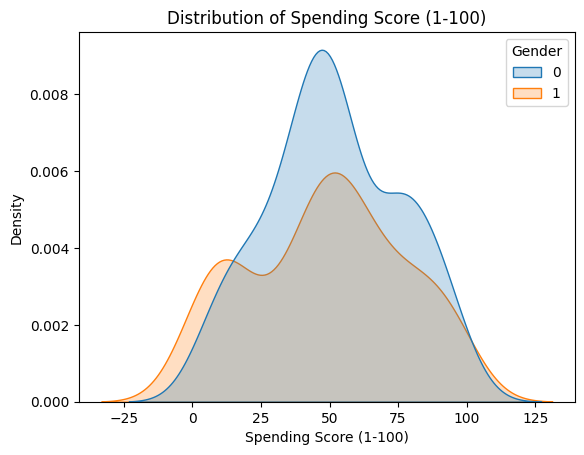

In [37]:
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

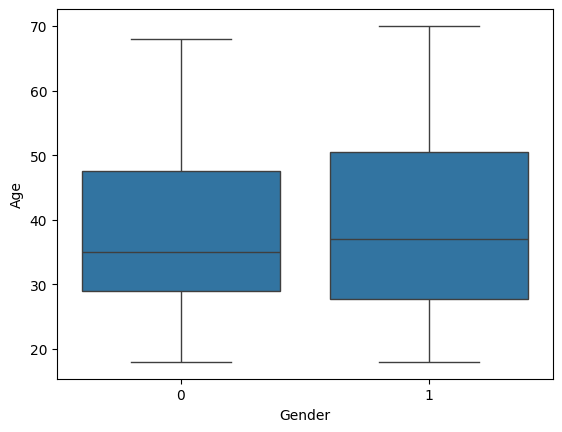

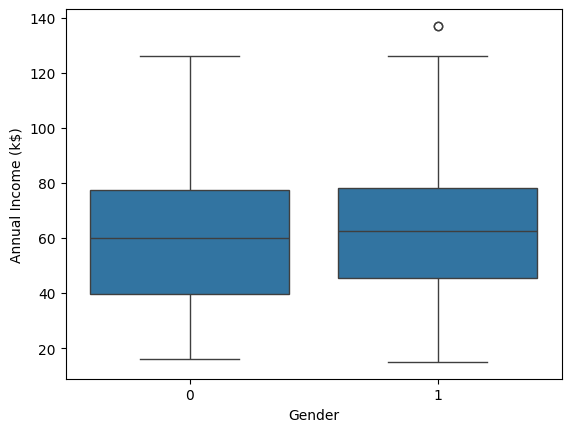

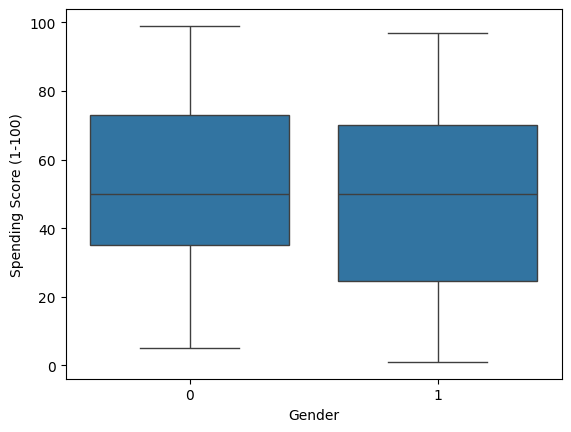

In [38]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [39]:
df['Gender'].value_counts(normalize=True)

Gender
0    0.56
1    0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

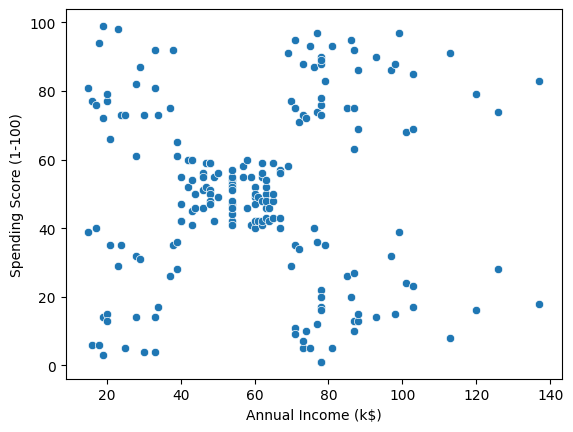

In [40]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

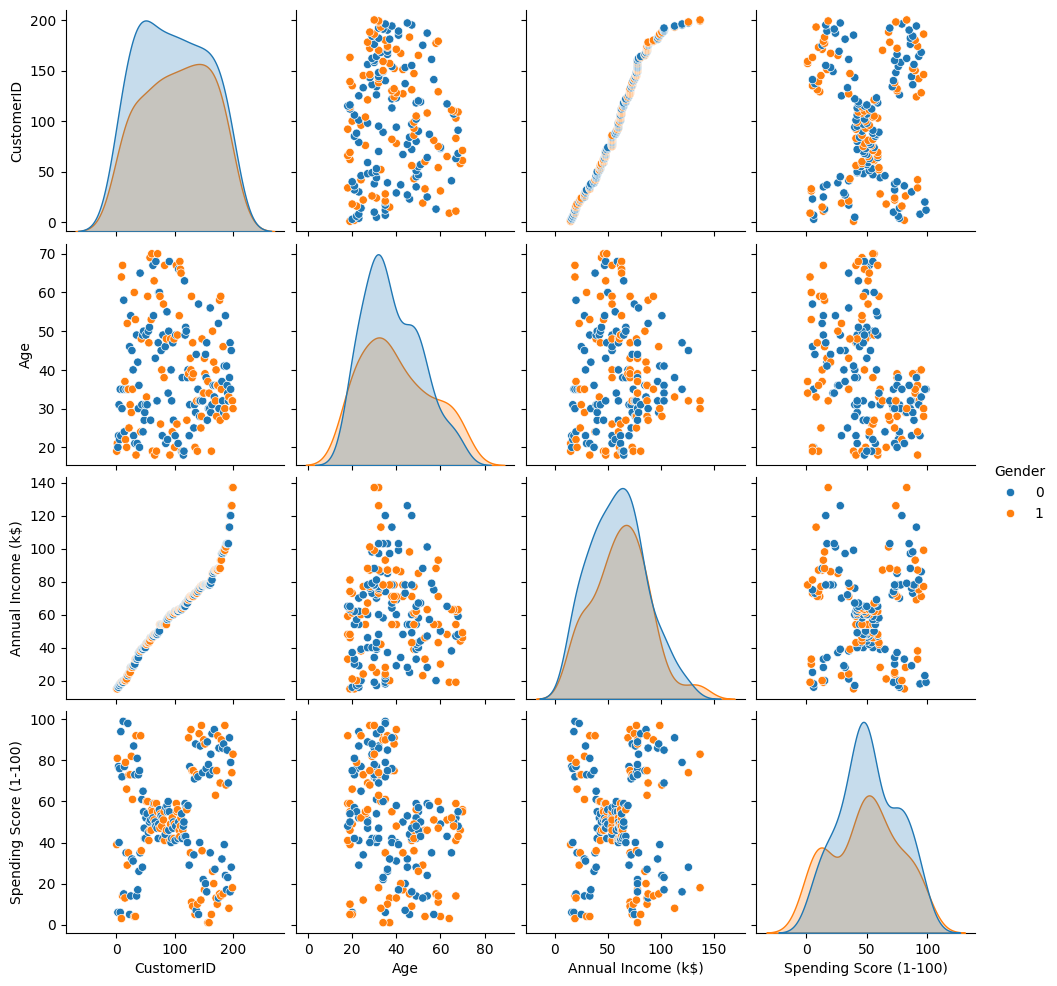

In [41]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [44]:
grouped_means = df.groupby('Gender').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
print(grouped_means)

              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
0       38.098214           59.250000               51.526786
1       39.806818           62.227273               48.511364


In [45]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

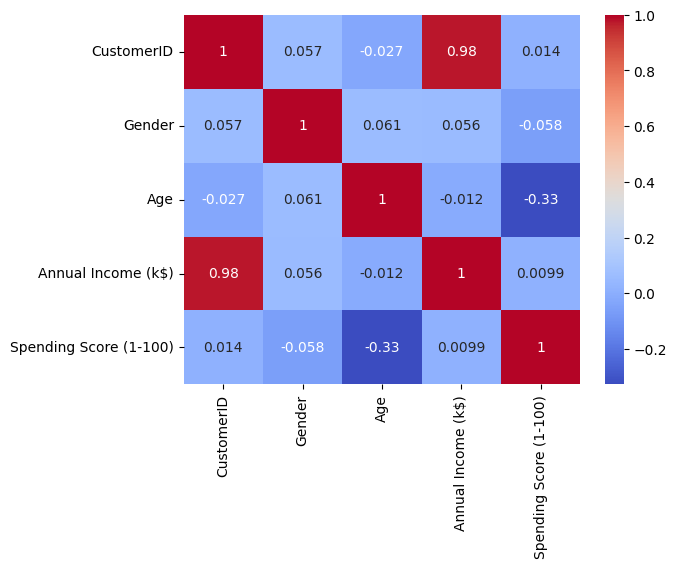

In [46]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [47]:
clustering1 = KMeans(n_clusters=3)

In [48]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [49]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [50]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [51]:
df['Income Cluster'].value_counts()

Income Cluster
1    86
2    58
0    56
Name: count, dtype: int64

In [52]:
clustering1.inertia_

25640.45778439684

In [53]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [54]:
intertia_scores

[137277.28000000006,
 49761.73701298703,
 25640.45778439684,
 13575.758441558439,
 8667.679614837507,
 5430.245925925925,
 4228.929304029306,
 3788.9039136302326,
 2521.6468253968246,
 1930.263738222563]

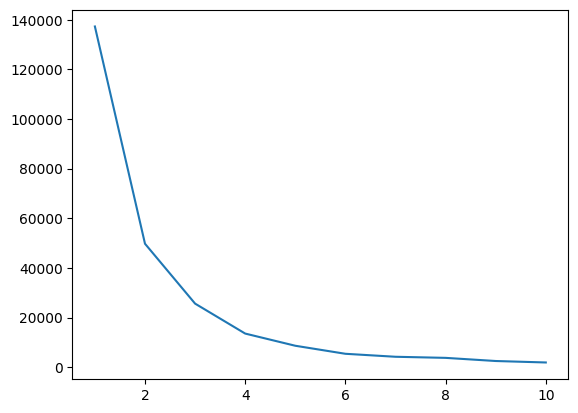

In [55]:
plt.plot(range(1,11),intertia_scores)

In [56]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [58]:
grouped_means = df.groupby('Income Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
print(grouped_means)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               36.910714           92.142857               50.517857
1               41.279070           60.906977               50.337209
2               37.120690           29.551724               49.689655


In [60]:
#Bivariate Clustering

In [61]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,4
1,2,1,21,15,81,2,2
2,3,0,20,16,6,2,4
3,4,0,23,16,77,2,2
4,5,0,31,17,40,2,4


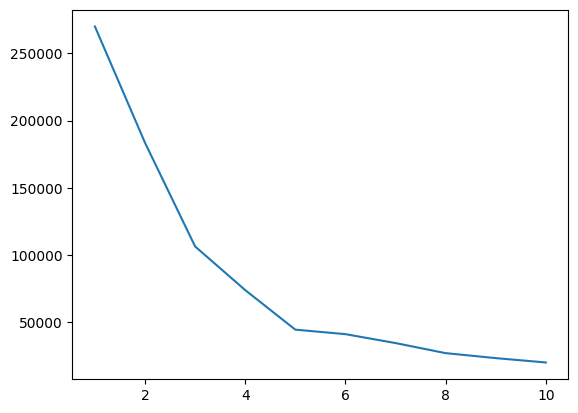

In [62]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [63]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

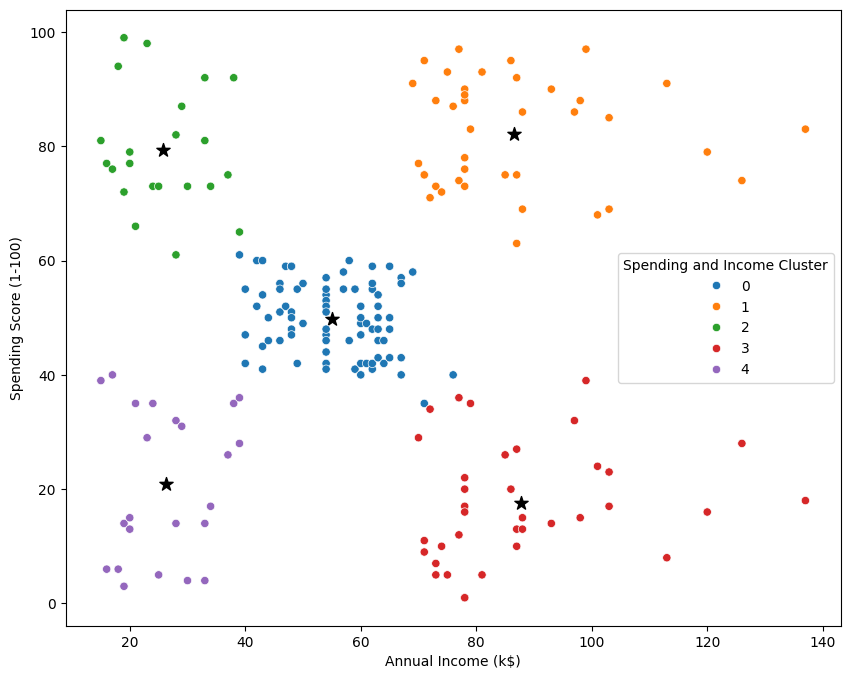

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [65]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.538462,0.461538
2,0.590909,0.409091
3,0.472222,0.527778
4,0.608696,0.391304


In [68]:
grouped_means = df.groupby('Spending and Income Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
print(grouped_means)


                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            42.937500           55.087500   
1                            32.692308           86.538462   
2                            25.272727           25.727273   
3                            40.666667           87.750000   
4                            45.217391           26.304348   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         49.712500  
1                                         82.128205  
2                                         79.363636  
3                                         17.583333  
4                                         20.913043  


In [69]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [70]:
scale = StandardScaler()

In [71]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,4
1,2,1,21,15,81,2,2
2,3,0,20,16,6,2,4
3,4,0,23,16,77,2,2
4,5,0,31,17,40,2,4


In [72]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,4
1,2,1,21,15,81,2,2
2,3,0,20,16,6,2,4
3,4,0,23,16,77,2,2
4,5,0,31,17,40,2,4


In [73]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [76]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df.head()

KeyError: "['Gender_Male'] not in index"

In [ ]:
dff = scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [75]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,4
1,2,1,21,15,81,2,2
2,3,0,20,16,6,2,4
3,4,0,23,16,77,2,2
4,5,0,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,0,35,120,79,0,1
196,197,0,45,126,28,0,3
197,198,1,32,126,74,0,1
198,199,1,32,137,18,0,3


In [78]:
df.to_csv('Clustering.csv')